In [ ]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input,Dense,Dropout 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten 
import cv2
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_gen_valid = ImageDataGenerator(rescale=1/255)

train_generator = data_gen_train.flow_from_directory(directory=r"./drive/My Drive/train_dataset/train_dataset1", target_size=(32,32), batch_size=10)
valid_generator = data_gen_valid.flow_from_directory(directory=r"./drive/My Drive/validation_dataset/validation_dataset1", target_size=(32,32), batch_size=5)

In [ ]:
inputs = Input(shape=(32,32,3))
x = Conv2D(filters = 64, kernel_size = 5, activation = 'relu')(inputs)
x = MaxPooling2D()(x)

x = Conv2D(filters = 32,kernel_size = 3,activation = 'relu')(x)  
x = MaxPooling2D()(x) 

x = Conv2D(filters = 32,kernel_size = 3,activation = 'relu')(x)  
x = MaxPooling2D()(x) 
#Dropout is used for removing the overfitting 
#We have added two Dropout layers here

x = Flatten()(x) 
x=Dense(256,activation='relu')(x)
outputs = Dense(36, activation = 'softmax')(x) 
 
model = Model(inputs = inputs, outputs = outputs) 
 
model.summary() 
 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)              

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [1]:
model.fit_generator(train_generator,epochs =30, steps_per_epoch=4210,validation_steps=2800,validation_data=valid_generator) 

NameError: ignored

In [ ]:
model.evaluate(valid_generator)


In [ ]:
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
data_gen_test=ImageDataGenerator(rescale=1/255)
test_generator = data_gen_test.flow_from_directory(directory=r"./drive/My Drive/test_dataset",arget_size=(32, 32),batch_size=15)
test_generator.reset()
pred=model.predict(test_generator[0],steps=1)

Found 15 images belonging to 1 classes.


In [ ]:
#it prints class indices of test images 
predicted_class_indices=np.argmax(pred,axis=-1)
print(predicted_class_indices)

[ 6  6  5  3  4  6 25  5  3 14  5  7  6  5  3]


In [ ]:
#this prints the class labels the images in test dataset belong to.
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predictions)

In [ ]:
#this code is for predicting a single character image.
def prediction(x): 

  switcher = { 
     
      0:'क',
      1:'क्ष',
      2:'ख',
      3:'ग',
      4:'घ',
      5:'ङ',
      6:'च',
      7:'छ',
      8:'ज',
      9:'ज्ञ',
      10:'झ',
      11:'ञ',
      12:'ट',
      13:'ठ',
      14:'ड',
      15:'ढ',
      16:'ण',
      17:'त',
      18:'त्र',
      19:'थ',
      20:'द',
      21:'ध',
      22:'न',
      23:'प',
      24:'फ',
      25:'ब',
      26:'भ',
      27:'म',
      28:'य',
      29:'र',
      30:'ल',
      31:'व',
      32:'श',
      33:'ष',
      34:'स',
      35:'ह'
      
     
  }

  return switcher.get(x) 


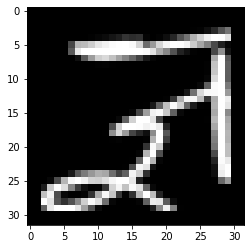

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2 
#Image to predict to out model 

img = cv2.imread(r"./drive/My Drive/test_dataset/characters/3583.png",3) 
#/content/drive/My Drive/test_dataset/characters/65238.png
plt.imshow(img) 

In [ ]:
img = np.expand_dims(img, axis= 0) 
img = np.expand_dims(img, axis = -1) 
pred = model.predict(img) 
print("The predicted character is:", prediction(np.argmax(pred))) 

The predicted character is: ज्ञ


In [ ]:
#this is for saving the trained model.
model.save('drive/My Drive/katogyaatrained2.h5')


In [ ]:
#this is for saving the predicted result in excel file.
import pandas as pd
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results4.csv",index=False)

In [ ]:
#this is for reloading the saved trained model.
import tensorflow.keras
model = tensorflow.keras.models.load_model('drive/My Drive/katogyaatrained2.h5')
print(model)